# Final Project Machine Learning Course


## Movie Genre Classification
Dataset link: [Genre Classification Dataset - IMDb](https://www.kaggle.com/datasets/hijest/genre-classification-dataset-imdb/data)





### We are tasked to classify genre to movie base on the description.






## Load dataset
### Overview:

The dataset is sourced from IMDb (Internet Movie Database),
a comprehensive online database containing information about films, TV shows, videos, games, and streaming content.

### Content:
The dataset consists of two main components: train data and test data.

* Train Data:

 - Each entry includes an ID, title, genre, and description.
 - The ID uniquely identifies each entry.
 - Title represents the name of the movie or TV show.
 - Genre specifies the category or categories to which the title belongs.
 - Description provides a brief overview or summary of the title's plot or content.

Test Data:

* Test Data:

    - Similar to train data, each entry comprises an ID, title, genre, and description.

In [1]:
import pandas as pd

#read the data using pandas

train_path = 'Genre Classification Dataset/train_data.txt'
train_data = pd.read_csv(train_path, delimiter=':::', engine='python', names=['ID', 'Title', 'Genre', 'Description'])

test_path = 'Genre Classification Dataset/test_data_solution.txt'
test_data = pd.read_csv(test_path, delimiter=':::', engine='python', names=['ID', 'Title', 'Genre', 'Description'])




In [2]:
# view the data
print("shape of train data")
print(train_data.shape)

print("shape of test data")
print(test_data.shape)

shape of train data
(54214, 4)
shape of test data
(54200, 4)


In [3]:
train_data.head(n=10)

ID                               Title          Genre  \
0   1       Oscar et la dame rose (2009)          drama    
1   2                       Cupid (1997)       thriller    
2   3   Young, Wild and Wonderful (1980)          adult    
3   4              The Secret Sin (1915)          drama    
4   5             The Unrecovered (2007)          drama    
5   6             Quality Control (2011)    documentary    
6   7                 "Pink Slip" (2009)         comedy    
7   8               One Step Away (1985)          crime    
8   9           "Desperate Hours" (2016)     reality-tv    
9  10                   Spirits (2014/I)         horror    

                                         Description  
0   Listening in to a conversation between his do...  
1   A brother and sister with a past incestuous r...  
2   As the bus empties the students for their fie...  
3   To help their unemployed father make ends mee...  
4   The film's title refers not only to the un-re...  
5   Quality Control consists of a series of 16mm ...  
6   In tough economic times Max and Joey have all...  
7   Ron Petrie (Keanu Reeves) is a troubled teen ...  
8   A sudden calamitous event, causing great loss...  
9   Four high school students embark on a terrify...

In [4]:
import nltk
from nltk import LancasterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\97252\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\97252\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\97252\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Data Cleaning and Preprocessing
We will clean and preprocess the data
- Remove duplicates and NaN values.
- Preprocess the text data (description) for better model performance.


In [5]:
## Check for Duplicates and Remove them
num = train_data.duplicated().sum()
print(num)
if num > 0:
    train_data.drop_duplicates(inplace=True)

0


In [6]:
## Check for nan values
num = train_data.isna().sum()
print(num)
train_data.dropna(inplace=True)

ID             0
Title          0
Genre          0
Description    0
dtype: int64


In [7]:
# Preprocessing

#Get the list of English stopwords
stop_words = set(stopwords.words('english'))
print(stop_words)



#Lanc = LancasterStemmer()


def clean_text(text):
    # Expand contractions


    # Remove URLs and email addresses
    text = re.sub(r'\b(?:https?://|www\.)\S+\b', '', text)
    text = re.sub(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b', '', text)

    # Remove special characters, punctuation, and symbols and numbers.
    text = re.sub(r'[^A-Za-z\s]', '', text)

    # Convert to lowercase
    text = text.lower()

    # Tokenize text
    word_tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))

    word_tokens = [word for word in word_tokens if word not in stop_words]

    # Lemmatization
    # We found that it didn't improve accuracy and might have even reduced it.
    # lemmatizer = WordNetLemmatizer()
    # tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Join tokens back into a single string
    cleaned_text = ' '.join(word_tokens)

    return cleaned_text



train_data['Text_cleaning'] = train_data['Description'].apply(clean_text)
test_data['Text_cleaning'] = test_data['Description'].apply(clean_text)
train_data.head()

{'not', "hadn't", 'some', 'an', 'on', 'were', 'his', 'he', 'shouldn', 'their', 'if', 'did', "she's", 'where', "don't", 'do', 'again', "you've", 'as', 'myself', 'shan', "won't", 'below', 't', 'a', 'who', 'don', 'doesn', 'after', 'whom', 'ma', 'd', 'itself', 'be', 'over', 'at', 'too', 'our', "doesn't", 'himself', 'which', 'but', "isn't", "should've", 'those', 'the', 'y', 'own', 'while', 're', 'doing', "needn't", 'about', 'all', 'any', 'more', 'than', 'when', 'm', "aren't", 'couldn', 'both', "couldn't", 'above', "haven't", 'didn', 'theirs', 'what', 'him', 'by', 'same', 'here', 'that', "you're", 'during', 'or', 'wasn', 'against', 'then', 'each', 'hasn', 'how', "didn't", 'haven', "you'd", 'in', 'had', 'with', 'no', 've', 'is', 'i', 'for', 'from', 's', "it's", 'under', "weren't", 'mustn', 'there', 'to', 'yours', 'ours', 'other', 'me', 'until', 'am', 'my', 'she', 'it', 'herself', 'most', "hasn't", 'this', 'out', 'them', 'needn', 'are', 'into', 'because', 'through', 'such', "mightn't", 'its', 

ID                               Title       Genre  \
0   1       Oscar et la dame rose (2009)       drama    
1   2                       Cupid (1997)    thriller    
2   3   Young, Wild and Wonderful (1980)       adult    
3   4              The Secret Sin (1915)       drama    
4   5             The Unrecovered (2007)       drama    

                                         Description  \
0   Listening in to a conversation between his do...   
1   A brother and sister with a past incestuous r...   
2   As the bus empties the students for their fie...   
3   To help their unemployed father make ends mee...   
4   The film's title refers not only to the un-re...   

                                       Text_cleaning  
0  listening conversation doctor parents yearold ...  
1  brother sister past incestuous relationship cu...  
2  bus empties students field trip museum natural...  
3  help unemployed father make ends meet edith tw...  
4  films title refers unrecovered bodies ground z...

###  Data Visualization


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
train_data["Genre"].value_counts()

Genre
drama           13613
documentary     13096
comedy           7447
short            5073
horror           2204
thriller         1591
action           1315
western          1032
reality-tv        884
family            784
adventure         775
music             731
romance           672
sci-fi            647
adult             590
crime             505
animation         498
sport             432
talk-show         391
fantasy           323
mystery           319
musical           277
biography         265
history           243
game-show         194
news              181
war               132
Name: count, dtype: int64

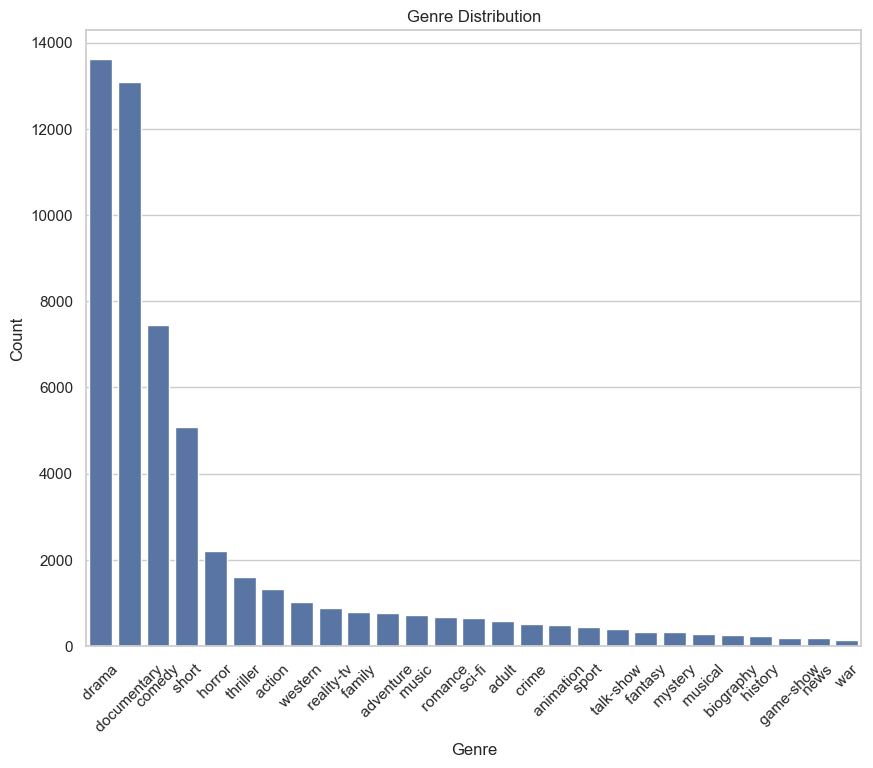

In [10]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Plotting genre distribution horizontally
plt.figure(figsize=(10, 8))
sns.countplot(x='Genre', data=train_data, order=train_data['Genre'].value_counts().index)
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

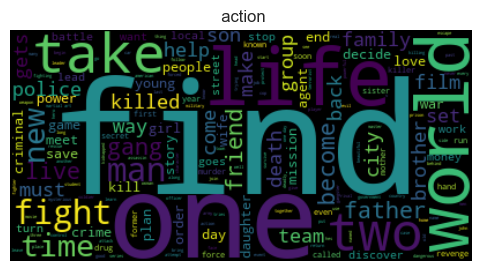

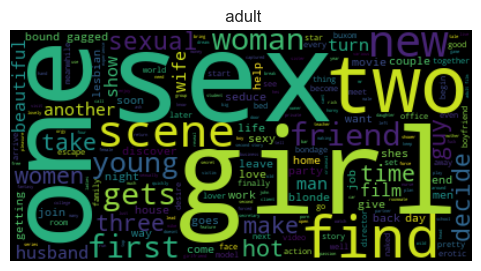

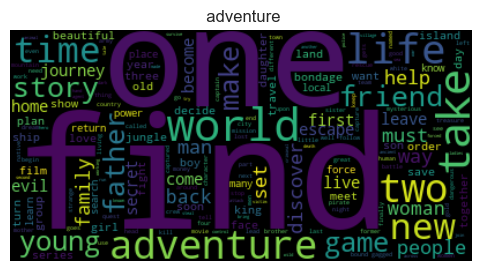

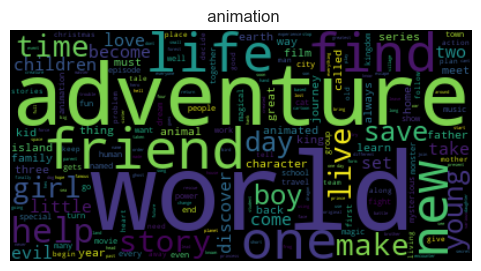

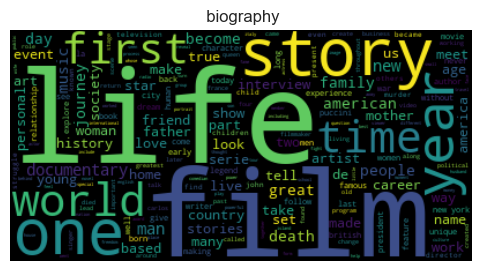

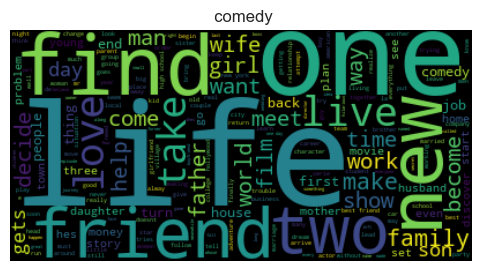

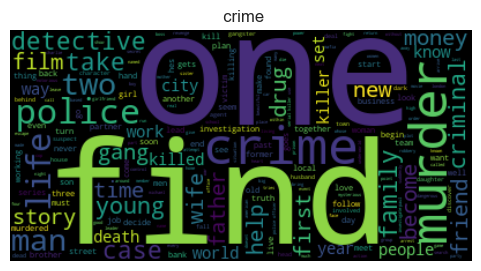

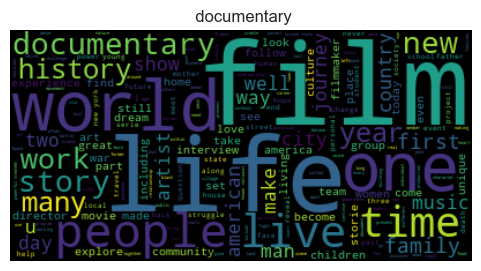

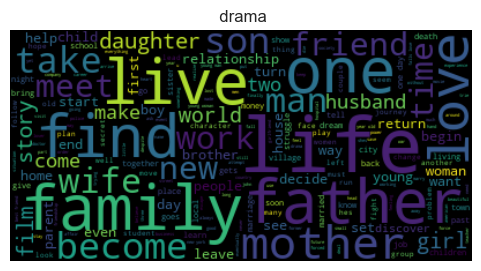

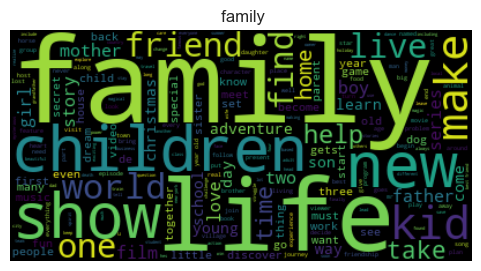

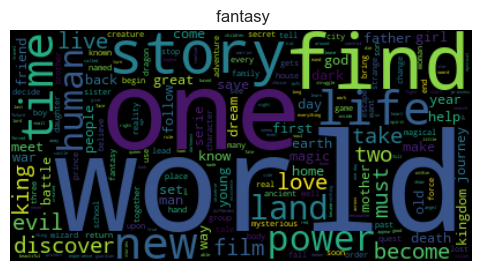

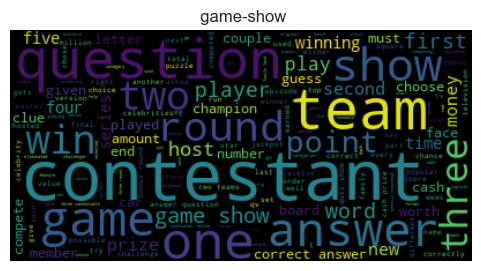

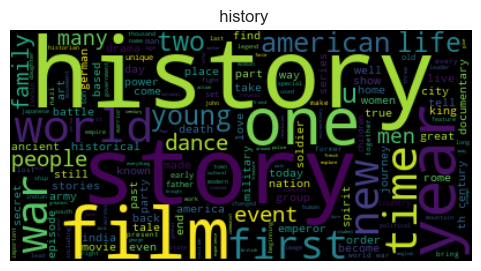

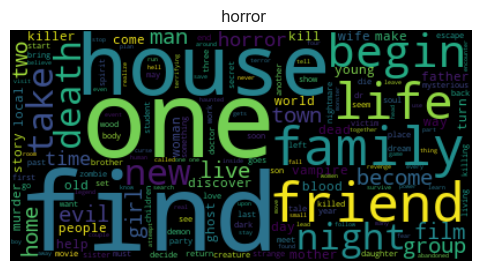

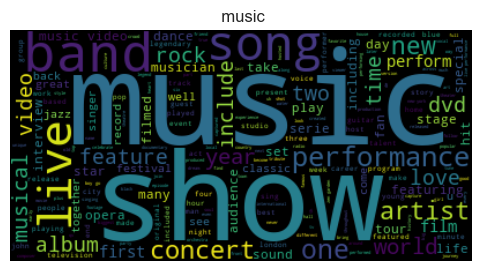

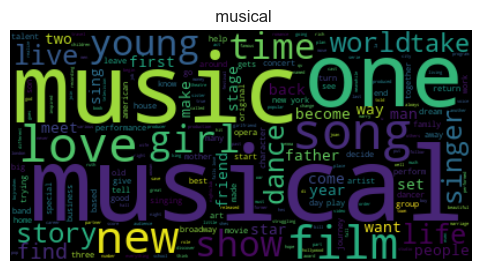

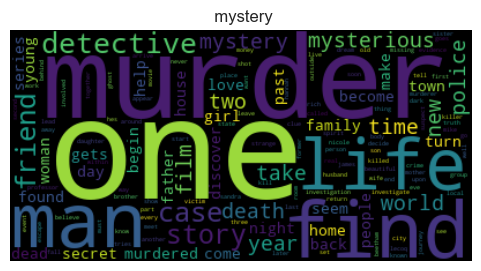

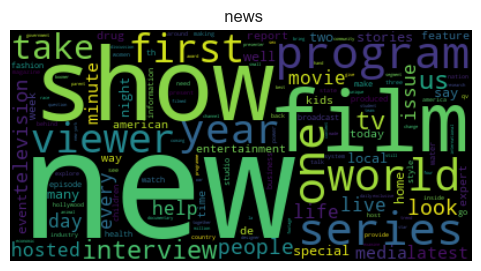

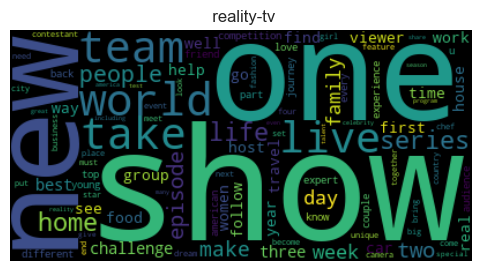

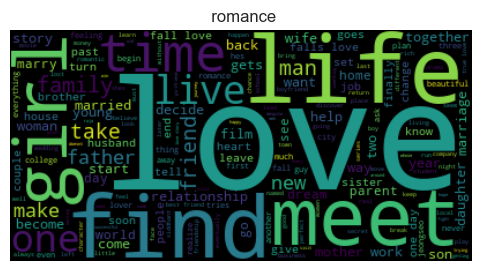

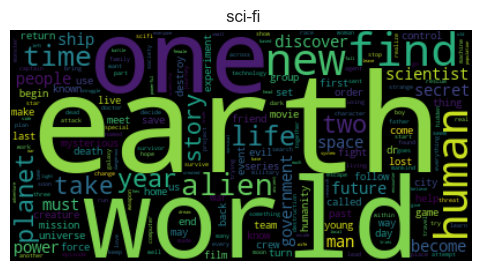

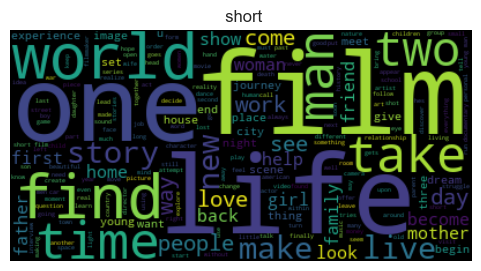

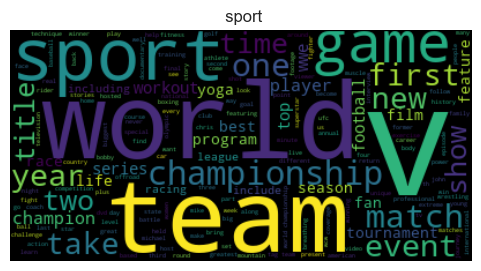

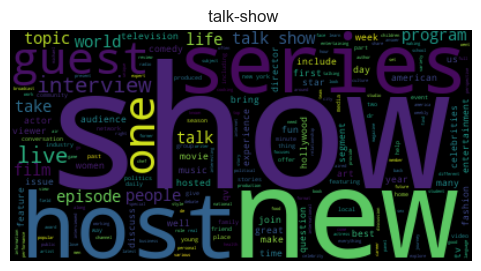

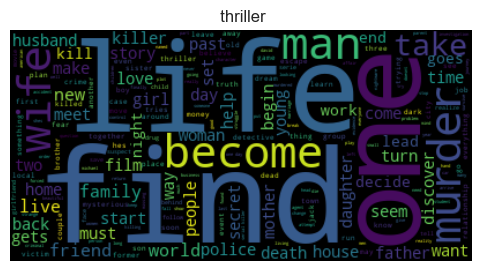

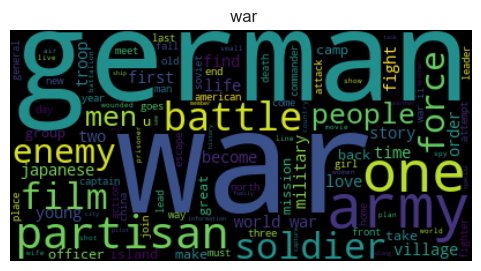

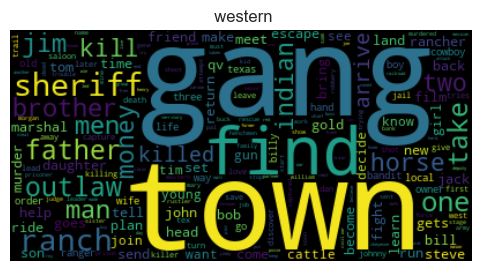

In [11]:
import wordcloud
from wordcloud import WordCloud


# Group movie descriptions by genre
genre_groups = train_data.groupby('Genre')['Text_cleaning'].apply(lambda x: ' '.join(x))

# Plot word clouds for each genre
for genre, descriptions in genre_groups.items():
    wordcloud = WordCloud(width=400, height=200).generate(descriptions)

    plt.figure(figsize=(6, 3))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f' {genre}')
    plt.axis('off')
    plt.show()

# Text to vectors

We want to try 2 different approaches here:
* CountVectorizer
* TF-IDF

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer


In [13]:

# CountVectorizer
count_vectorizer = CountVectorizer()
count_vectors_train = count_vectorizer.fit_transform(train_data['Text_cleaning'])
count_vectors_test = count_vectorizer.transform(test_data['Text_cleaning'])

# TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectors_train = tfidf_vectorizer.fit_transform(train_data['Text_cleaning'])
tfidf_vectors_test = tfidf_vectorizer.transform(test_data['Text_cleaning'])



# Evaluate the Model
We aim to evaluate various models on our dataset to determine which one yields the best results.

## Models to be Evaluated:
* Naive Bayes: Naive Bayes is a probabilistic classifier based on Bayes' theorem with the assumption of independence between features. It's simple yet effective for text classification tasks.

* K-Nearest Neighbors (KNN): KNN is a non-parametric, lazy learning algorithm used for classification and regression tasks. It classifies objects based on the majority votes of its neighbors.

* Decision Tree Classifier: Decision trees recursively split the data into subsets based on the most significant attribute at each step. They're intuitive and can handle both numerical and categorical data.

* Random Forest: Random Forest is an ensemble learning method that constructs multiple decision trees during training and outputs the mode of the classes (classification) or the mean prediction (regression) of the individual trees.

* Logistic Regression: Despite its name, logistic regression is a linear model for binary classification that predicts the probability of occurrence of an event by fitting data to a logistic function.

* Support Vector Machine (SVM): SVM is a powerful supervised learning algorithm used for classification and regression tasks. It finds the hyperplane that best separates data into different classes.

In [14]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

### Naive Bayes

Naive Bayes using Tf-Idf
Accuracy: 0.44359778597785976

Classification Report:


C:\Users\97252\PycharmProjects\Movie Genre Classification\Script\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\97252\PycharmProjects\Movie Genre Classification\Script\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\97252\PycharmProjects\Movie Genre Classification\Script\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

               precision    recall  f1-score   support

      action        0.00      0.00      0.00      1314
       adult        0.00      0.00      0.00       590
   adventure        0.00      0.00      0.00       775
   animation        0.00      0.00      0.00       498
   biography        0.00      0.00      0.00       264
      comedy        0.73      0.04      0.07      7446
       crime        0.00      0.00      0.00       505
 documentary        0.53      0.90      0.67     13096
       drama        0.38      0.88      0.53     13612
      family        0.00      0.00      0.00       783
     fantasy        0.00      0.00      0.00       322
   game-show        0.00      0.00      0.00       193
     history        0.00      0.00      0.00       243
      horror        0.00      0.00      0.00      2204
       music        0.00      0.00      0.00       731
     musical        0.00      0.00      0.00       276
     mystery        0.00      0.00      0.00       318
        n

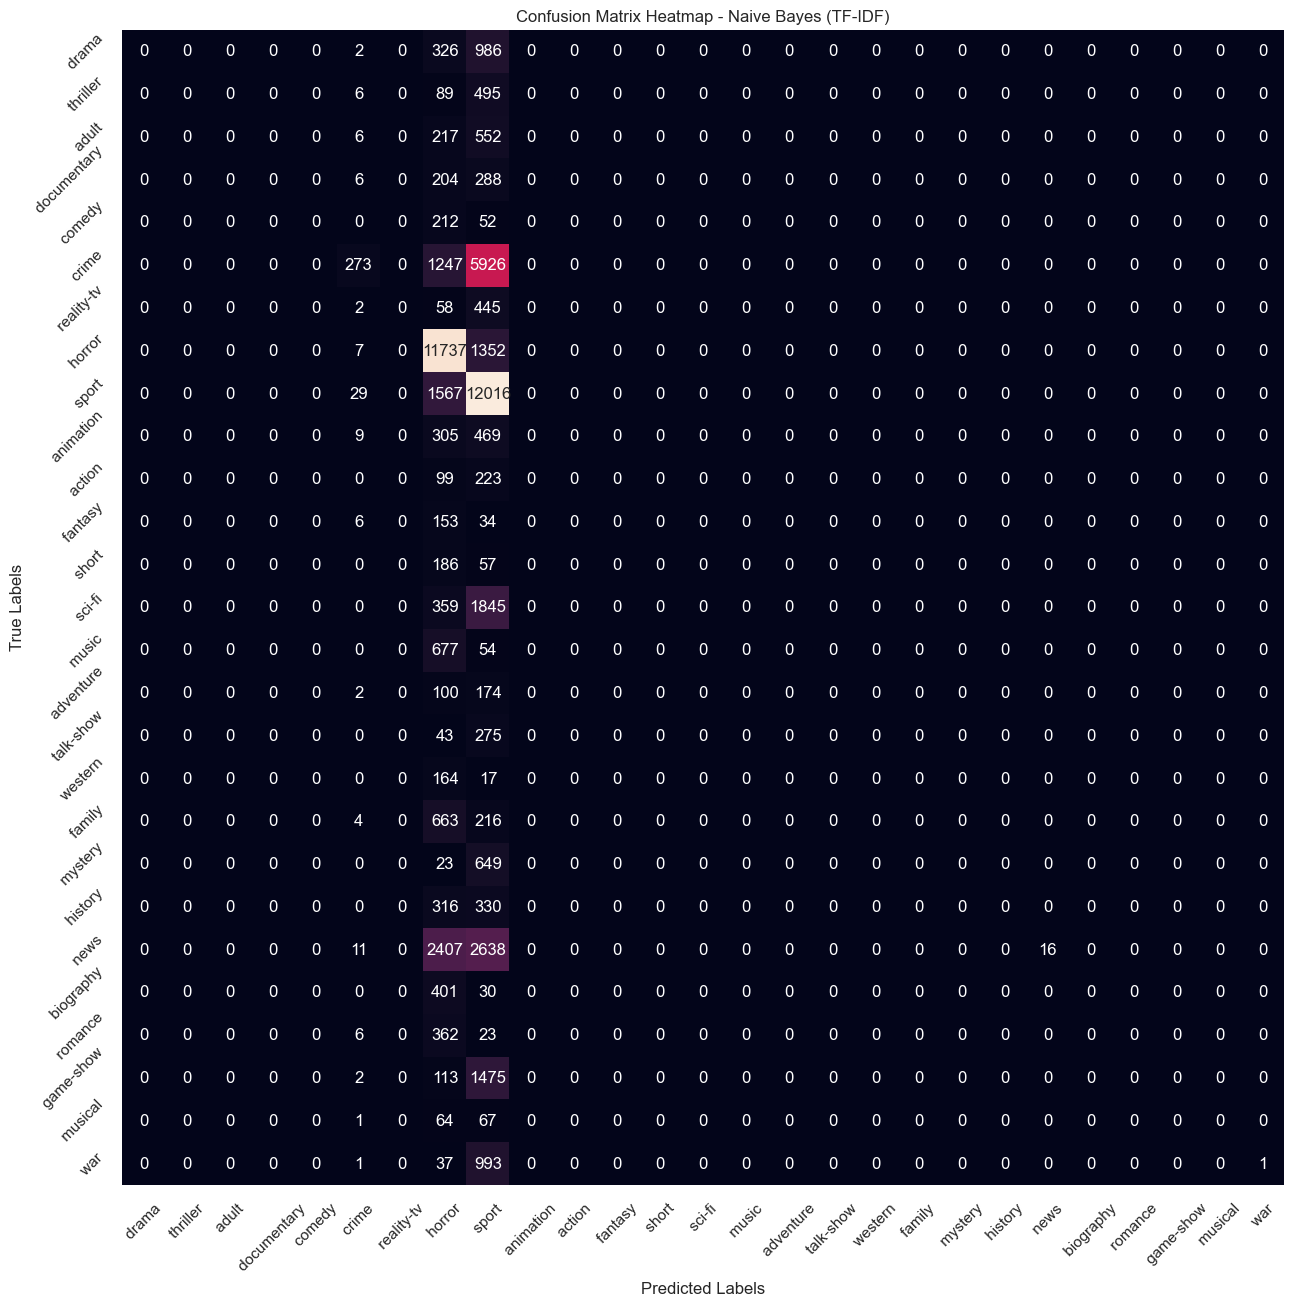

In [15]:
print('Naive Bayes using Tf-Idf')

# Initialize the Naive Bayes classifier
nb_tfidf_classifier = MultinomialNB()

# Train the classifier
nb_tfidf_classifier.fit(tfidf_vectors_train, train_data['Genre'])

# Make predictions on the test data
predictions_nb_tfidf = nb_tfidf_classifier.predict(tfidf_vectors_test)

# Evaluate the model
accuracy_tfidf = accuracy_score(test_data['Genre'], predictions_nb_tfidf)
print("Accuracy:", accuracy_tfidf)

# Get classification report
print("\nClassification Report:")
print(classification_report(test_data['Genre'], predictions_nb_tfidf))


# Confusion matrix for Naive Bayes with TF-IDF
cm_nb_tfidf = confusion_matrix(test_data['Genre'], predictions_nb_tfidf)
plt.figure(figsize=(15, 15))
sns.heatmap(cm_nb_tfidf, annot=True, fmt='d', cbar=False,
            xticklabels=train_data['Genre'].unique(), yticklabels=train_data['Genre'].unique())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap - Naive Bayes (TF-IDF)')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()


Naive Bayes using CountVectorizer
Accuracy with CountVectorizer: 0.5248154981549815

Classification Report with CountVectorizer:


C:\Users\97252\PycharmProjects\Movie Genre Classification\Script\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\97252\PycharmProjects\Movie Genre Classification\Script\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\97252\PycharmProjects\Movie Genre Classification\Script\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

               precision    recall  f1-score   support

      action        0.60      0.04      0.08      1314
       adult        0.49      0.03      0.05       590
   adventure        0.74      0.05      0.10       775
   animation        0.00      0.00      0.00       498
   biography        0.00      0.00      0.00       264
      comedy        0.53      0.45      0.49      7446
       crime        0.00      0.00      0.00       505
 documentary        0.57      0.90      0.69     13096
       drama        0.46      0.83      0.59     13612
      family        1.00      0.00      0.01       783
     fantasy        0.00      0.00      0.00       322
   game-show        0.97      0.18      0.31       193
     history        0.00      0.00      0.00       243
      horror        0.74      0.28      0.41      2204
       music        0.94      0.07      0.13       731
     musical        0.00      0.00      0.00       276
     mystery        0.00      0.00      0.00       318
        n

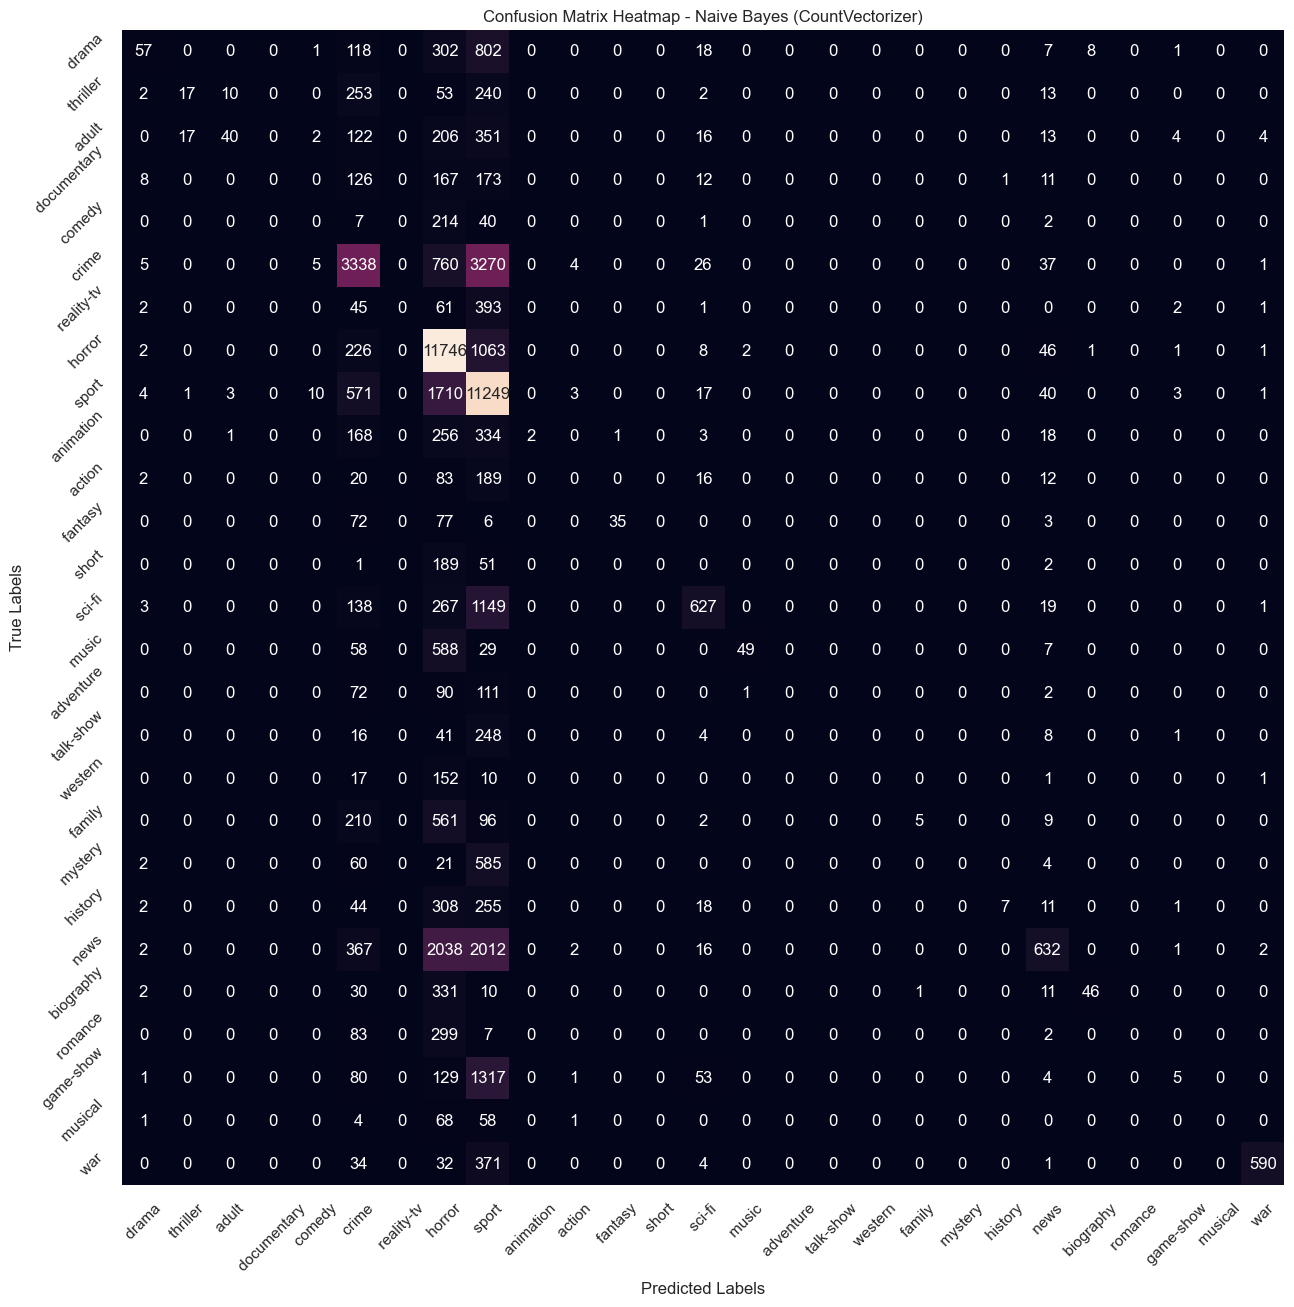

In [16]:
print('Naive Bayes using CountVectorizer')
# Initialize the Naive Bayes classifier
nb_classifier_count = MultinomialNB()

# Train the classifier
nb_classifier_count.fit(count_vectors_train, train_data['Genre'])

# Make predictions on the test data
predictions_nb_count = nb_classifier_count.predict(count_vectors_test)

# Evaluate the model
accuracy_count = accuracy_score(test_data['Genre'], predictions_nb_count)
print("Accuracy with CountVectorizer:", accuracy_count)

# Get classification report
print("\nClassification Report with CountVectorizer:")
print(classification_report(test_data['Genre'], predictions_nb_count))



# Confusion matrix for Naive Bayes with CountVectorizer
cm_nb_count = confusion_matrix(test_data['Genre'], predictions_nb_count)
plt.figure(figsize=(15, 15))
sns.heatmap(cm_nb_count, annot=True, fmt='d', cbar=False,
            xticklabels=train_data['Genre'].unique(), yticklabels=train_data['Genre'].unique())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap - Naive Bayes (CountVectorizer)')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

### Logistic Regression

Logistic Regression using Tf-Idf
Accuracy: 0.589280442804428

Classification Report:


C:\Users\97252\PycharmProjects\Movie Genre Classification\Script\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\97252\PycharmProjects\Movie Genre Classification\Script\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\97252\PycharmProjects\Movie Genre Classification\Script\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

               precision    recall  f1-score   support

      action        0.53      0.25      0.34      1314
       adult        0.63      0.19      0.30       590
   adventure        0.70      0.14      0.23       775
   animation        0.59      0.03      0.05       498
   biography        0.00      0.00      0.00       264
      comedy        0.54      0.59      0.57      7446
       crime        0.45      0.02      0.03       505
 documentary        0.66      0.87      0.75     13096
       drama        0.54      0.80      0.64     13612
      family        0.53      0.06      0.11       783
     fantasy        0.75      0.02      0.04       322
   game-show        0.92      0.47      0.62       193
     history        0.00      0.00      0.00       243
      horror        0.67      0.57      0.62      2204
       music        0.71      0.39      0.50       731
     musical        1.00      0.00      0.01       276
     mystery        1.00      0.00      0.01       318
        n

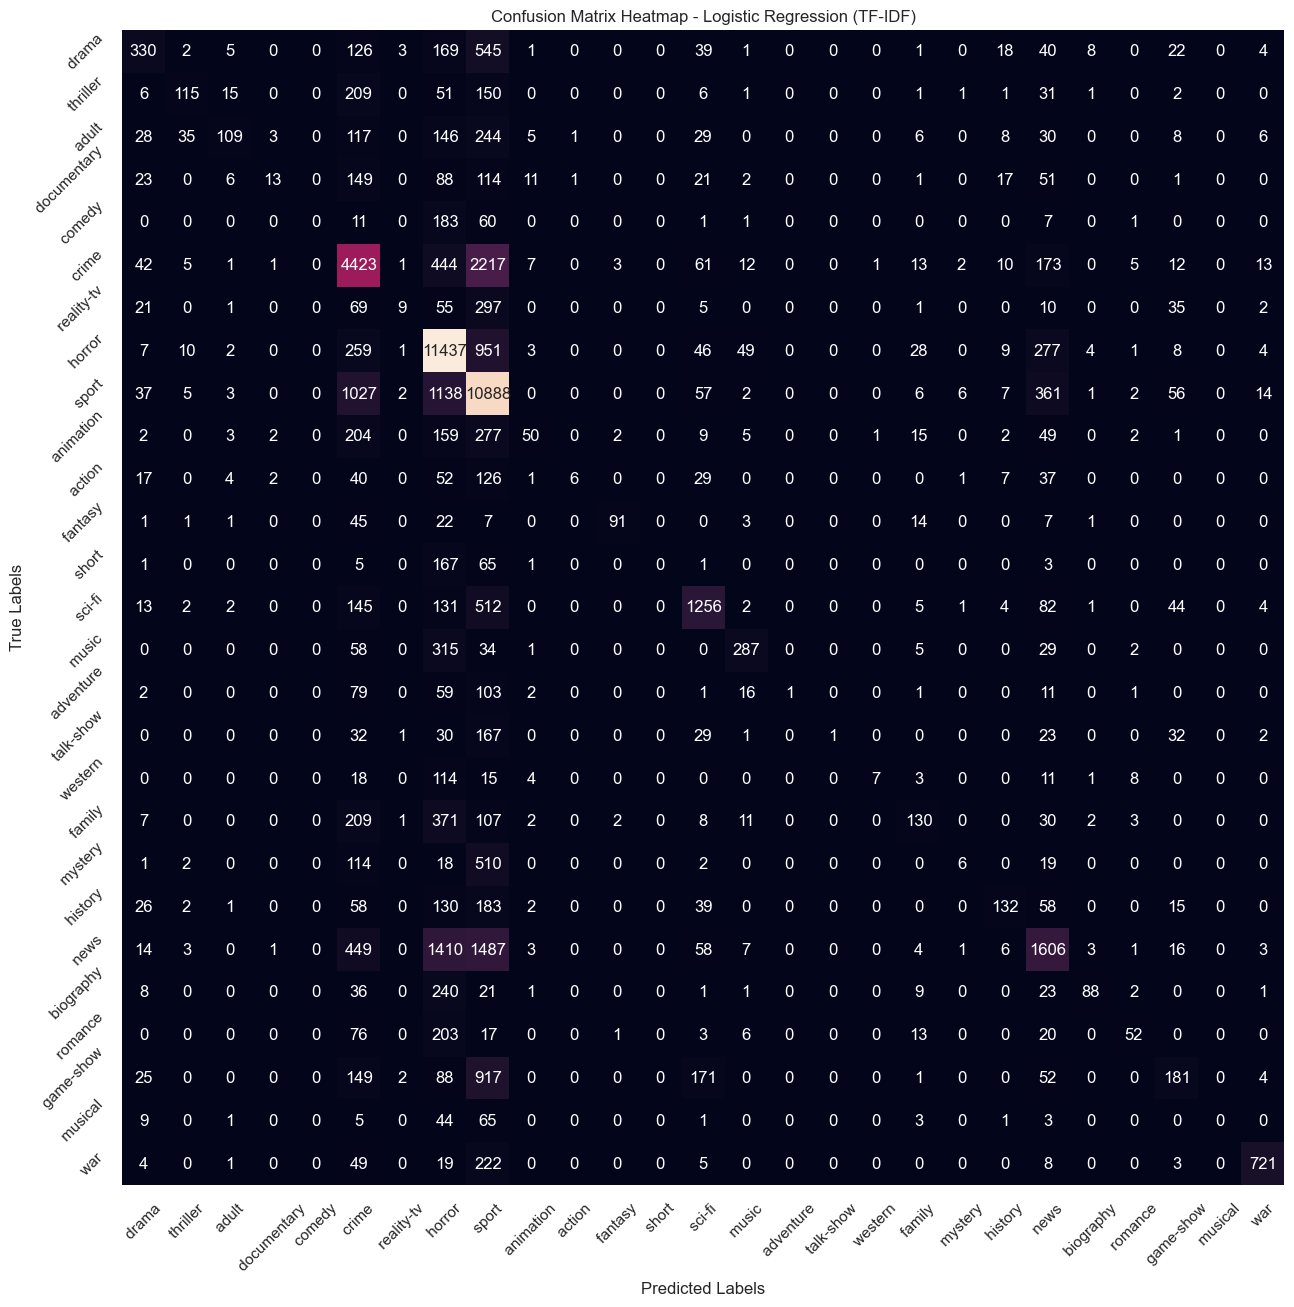

In [17]:
# Logistic Regression
print('Logistic Regression using Tf-Idf')

# Initialize the Logistic Regression classifier
lr_tfidf_classifier = LogisticRegression(max_iter=1000)

# Train the classifier
lr_tfidf_classifier.fit(tfidf_vectors_train, train_data['Genre'])

# Make predictions on the test data
predictions_lr_tfidf = lr_tfidf_classifier.predict(tfidf_vectors_test)

# Evaluate the model
accuracy_lr_tfidf = accuracy_score(test_data['Genre'], predictions_lr_tfidf)
print("Accuracy:", accuracy_lr_tfidf)

# Get classification report
print("\nClassification Report:")
print(classification_report(test_data['Genre'], predictions_lr_tfidf))

# Confusion matrix for Logistic Regression with TF-IDF
cm_lr_tfidf = confusion_matrix(test_data['Genre'], predictions_lr_tfidf)
plt.figure(figsize=(15, 15))
sns.heatmap(cm_lr_tfidf, annot=True, fmt='d', cbar=False,
            xticklabels=train_data['Genre'].unique(), yticklabels=train_data['Genre'].unique())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap - Logistic Regression (TF-IDF)')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()


Logistic Regression using CountVectorizer
Accuracy: 0.5671217712177121

Classification Report:
               precision    recall  f1-score   support

      action        0.40      0.34      0.37      1314
       adult        0.61      0.39      0.48       590
   adventure        0.44      0.23      0.30       775
   animation        0.34      0.13      0.19       498
   biography        0.12      0.02      0.03       264
      comedy        0.53      0.57      0.55      7446
       crime        0.20      0.09      0.12       505
 documentary        0.70      0.78      0.74     13096
       drama        0.56      0.69      0.62     13612
      family        0.36      0.17      0.23       783
     fantasy        0.25      0.09      0.13       322
   game-show        0.83      0.58      0.68       193
     history        0.18      0.04      0.06       243
      horror        0.63      0.59      0.61      2204
       music        0.62      0.49      0.55       731
     musical        0.28

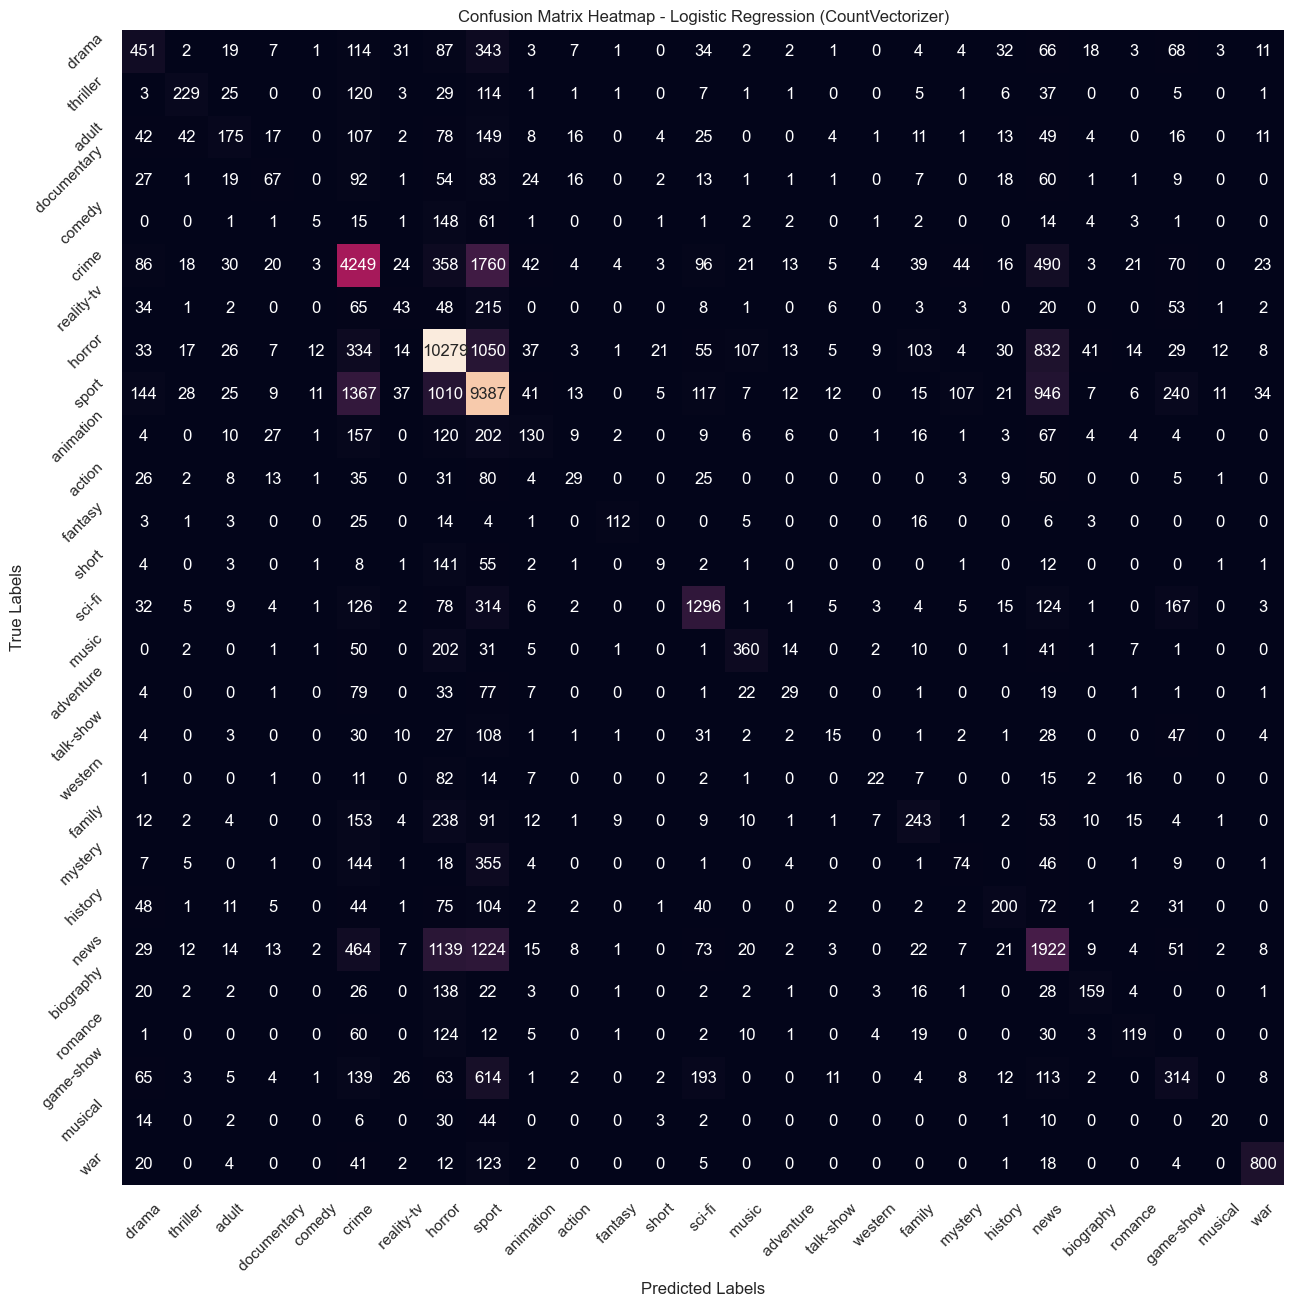

In [18]:
# Logistic Regression using CountVectorizer
print('Logistic Regression using CountVectorizer')

# Initialize the Logistic Regression classifier
lr_count_classifier = LogisticRegression(max_iter=1000)

# Train the classifier
lr_count_classifier.fit(count_vectors_train, train_data['Genre'])

# Make predictions on the test data
predictions_lr_count = lr_count_classifier.predict(count_vectors_test)

# Evaluate the model
accuracy_lr_count = accuracy_score(test_data['Genre'], predictions_lr_count)
print("Accuracy:", accuracy_lr_count)

# Get classification report
print("\nClassification Report:")
print(classification_report(test_data['Genre'], predictions_lr_count))

# Confusion matrix for Logistic Regression with CountVectorizer
cm_lr_count = confusion_matrix(test_data['Genre'], predictions_lr_count)
plt.figure(figsize=(15, 15))
sns.heatmap(cm_lr_count, annot=True, fmt='d', cbar=False,
            xticklabels=train_data['Genre'].unique(), yticklabels=train_data['Genre'].unique())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap - Logistic Regression (CountVectorizer)')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()


### Support Vector Machine (SVM)

Support Vector Machine using Tf-Idf
Accuracy: 0.5801291512915129

Classification Report:


C:\Users\97252\PycharmProjects\Movie Genre Classification\Script\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\97252\PycharmProjects\Movie Genre Classification\Script\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\97252\PycharmProjects\Movie Genre Classification\Script\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

               precision    recall  f1-score   support

      action        0.61      0.18      0.28      1314
       adult        0.66      0.17      0.27       590
   adventure        0.77      0.15      0.25       775
   animation        0.44      0.01      0.02       498
   biography        0.00      0.00      0.00       264
      comedy        0.55      0.56      0.55      7446
       crime        0.80      0.01      0.02       505
 documentary        0.65      0.89      0.75     13096
       drama        0.51      0.83      0.63     13612
      family        0.62      0.04      0.07       783
     fantasy        1.00      0.01      0.02       322
   game-show        0.93      0.52      0.66       193
     history        0.00      0.00      0.00       243
      horror        0.70      0.54      0.61      2204
       music        0.78      0.31      0.44       731
     musical        0.00      0.00      0.00       276
     mystery        0.00      0.00      0.00       318
        n

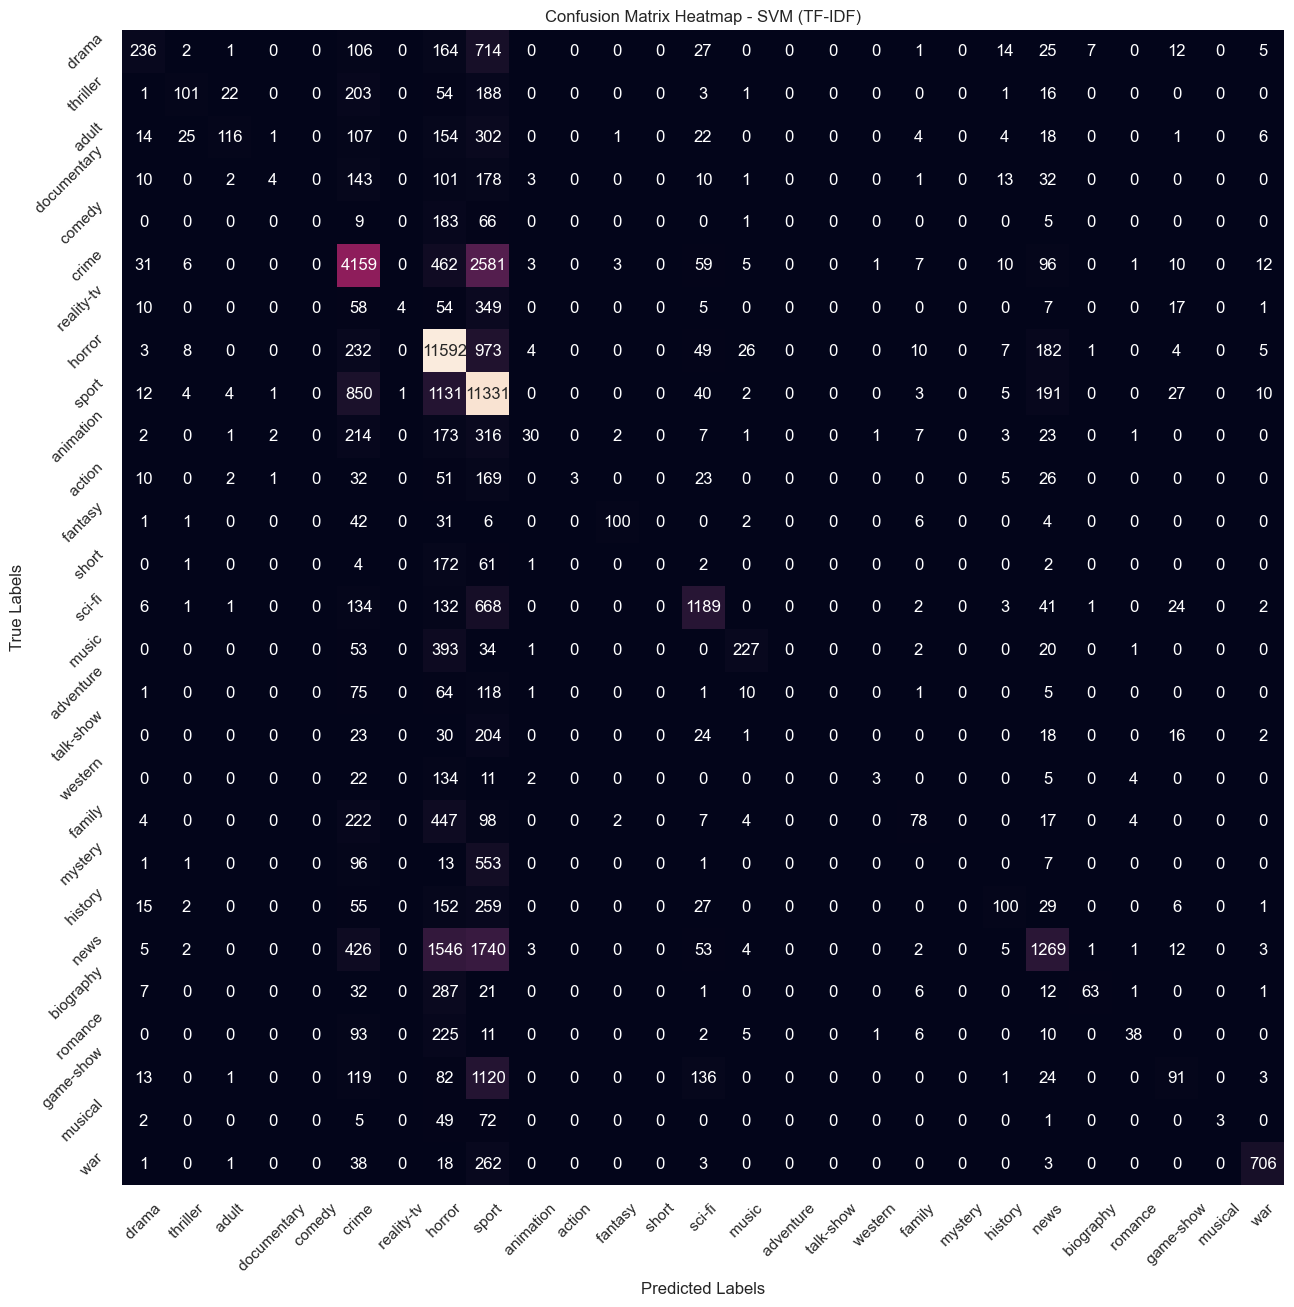

In [19]:
# Support Vector Machine (SVM)
print('Support Vector Machine using Tf-Idf')

# Initialize the SVM classifier
svm_tfidf_classifier = SVC()

# Train the classifier
svm_tfidf_classifier.fit(tfidf_vectors_train, train_data['Genre'])

# Make predictions on the test data
predictions_svm_tfidf = svm_tfidf_classifier.predict(tfidf_vectors_test)

# Evaluate the model
accuracy_svm_tfidf = accuracy_score(test_data['Genre'], predictions_svm_tfidf)
print("Accuracy:", accuracy_svm_tfidf)

# Get classification report
print("\nClassification Report:")
print(classification_report(test_data['Genre'], predictions_svm_tfidf))

# Confusion matrix for SVM with TF-IDF
cm_svm_tfidf = confusion_matrix(test_data['Genre'], predictions_svm_tfidf)
plt.figure(figsize=(15, 15))
sns.heatmap(cm_svm_tfidf, annot=True, fmt='d', cbar=False,
            xticklabels=train_data['Genre'].unique(), yticklabels=train_data['Genre'].unique())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap - SVM (TF-IDF)')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [ ]:
# Support Vector Machine (SVM) using CountVectorizer
print('Support Vector Machine using CountVectorizer')

# Initialize the SVM classifier
svm_count_classifier = SVC()

# Train the classifier
svm_count_classifier.fit(count_vectors_train, train_data['Genre'])

# Make predictions on the test data
predictions_svm_count = svm_count_classifier.predict(count_vectors_test)

# Evaluate the model
accuracy_svm_count = accuracy_score(test_data['Genre'], predictions_svm_count)
print("Accuracy:", accuracy_svm_count)

# Get classification report
print("\nClassification Report:")
print(classification_report(test_data['Genre'], predictions_svm_count))

# Confusion matrix for SVM with CountVectorizer
cm_svm_count = confusion_matrix(test_data['Genre'], predictions_svm_count)
plt.figure(figsize=(15, 15))
sns.heatmap(cm_svm_count, annot=True, fmt='d', cbar=False,
            xticklabels=train_data['Genre'].unique(), yticklabels=train_data['Genre'].unique())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap - SVM (CountVectorizer)')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

Support Vector Machine using CountVectorizer


### KNN

In [ ]:
print("KNN using tfidf")

knn_classifier_tfidf = KNeighborsClassifier()

# Train the KNN classifier
knn_classifier_tfidf.fit(tfidf_vectors_train, train_data['Genre'])

# Make predictions on the test data using KNN
predictions_knn_tfidf = knn_classifier_tfidf.predict(tfidf_vectors_test)

# Evaluate the KNN model
accuracy_knn_tfidf  = accuracy_score(test_data['Genre'], predictions_knn_tfidf)
print("\nAccuracy (KNN):", accuracy_knn_tfidf)

# Get classification report for KNN
print("\nClassification Report (KNN):")
print(classification_report(test_data['Genre'], accuracy_knn_tfidf))

# Confusion matrix for KNN with TF-IDF
cm_knn_tfidf = confusion_matrix(test_data['Genre'], predictions_knn_tfidf)
plt.figure(figsize=(15, 15))
sns.heatmap(cm_knn_tfidf, annot=True, fmt='d', cbar=False,
            xticklabels=train_data['Genre'].unique(), yticklabels=train_data['Genre'].unique())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap - KNN (TF-IDF)')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [ ]:
print("KNN using CountVectorizer")
# Initialize the KNN classifier
knn_classifier_count = KNeighborsClassifier()

# Train the KNN classifier
knn_classifier_count.fit(count_vectors_train, train_data['Genre'])

# Make predictions on the test data using KNN
predictions_knn_count = knn_classifier_count.predict(count_vectors_test)

# Evaluate the KNN model
accuracy_knn_count = accuracy_score(test_data['Genre'], predictions_knn_count)
print("\nAccuracy (KNN):", accuracy_knn_count)

# Get classification report for KNN
print("\nClassification Report (KNN):")
print(classification_report(test_data['Genre'], predictions_knn_count))


# Confusion matrix for KNN with CountVectorizer
cm_knn_count = confusion_matrix(test_data['Genre'], predictions_knn_count)
plt.figure(figsize=(15, 15))
sns.heatmap(cm_knn_count, annot=True, fmt='d', cbar=False,
            xticklabels=train_data['Genre'].unique(), yticklabels=train_data['Genre'].unique())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap - KNN (CountVectorizer)')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

### Decision Tree Classifier

In [ ]:
# Decision Tree Classifier
print('Decision Tree Classifier using Tf-Idf')

# Initialize the Decision Tree classifier
dt_tfidf_classifier = DecisionTreeClassifier()

# Train the classifier
dt_tfidf_classifier.fit(tfidf_vectors_train, train_data['Genre'])

# Make predictions on the test data
predictions_dt_tfidf = dt_tfidf_classifier.predict(tfidf_vectors_test)

# Evaluate the model
accuracy_dt_tfidf = accuracy_score(test_data['Genre'], predictions_dt_tfidf)
print("Accuracy:", accuracy_dt_tfidf)

# Get classification report
print("\nClassification Report:")
print(classification_report(test_data['Genre'], predictions_dt_tfidf))

# Confusion matrix for Decision Tree with TF-IDF
cm_dt_tfidf = confusion_matrix(test_data['Genre'], predictions_dt_tfidf)
plt.figure(figsize=(15, 15))
sns.heatmap(cm_dt_tfidf, annot=True, fmt='d', cbar=False,
            xticklabels=train_data['Genre'].unique(), yticklabels=train_data['Genre'].unique())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap - Decision Tree (TF-IDF)')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [ ]:
# Decision Tree Classifier using CountVectorizer
print('Decision Tree Classifier using CountVectorizer')

# Initialize the Decision Tree classifier
dt_count_classifier = DecisionTreeClassifier()

# Train the classifier
dt_count_classifier.fit(count_vectors_train, train_data['Genre'])

# Make predictions on the test data
predictions_dt_count = dt_count_classifier.predict(count_vectors_test)

# Evaluate the model
accuracy_dt_count = accuracy_score(test_data['Genre'], predictions_dt_count)
print("Accuracy:", accuracy_dt_count)

# Get classification report
print("\nClassification Report:")
print(classification_report(test_data['Genre'], predictions_dt_count))

# Confusion matrix for Decision Tree with CountVectorizer
cm_dt_count = confusion_matrix(test_data['Genre'], predictions_dt_count)
plt.figure(figsize=(15, 15))
sns.heatmap(cm_dt_count, annot=True, fmt='d', cbar=False,
            xticklabels=train_data['Genre'].unique(), yticklabels=train_data['Genre'].unique())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap - Decision Tree (CountVectorizer)')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

### Random Forest

In [ ]:
# Random Forest Classifier
print('Random Forest Classifier using Tf-Idf')

# Initialize the Random Forest classifier
rf_tfidf_classifier = RandomForestClassifier()

# Train the classifier
rf_tfidf_classifier.fit(tfidf_vectors_train, train_data['Genre'])

# Make predictions on the test data
predictions_rf_tfidf = rf_tfidf_classifier.predict(tfidf_vectors_test)

# Evaluate the model
accuracy_rf_tfidf = accuracy_score(test_data['Genre'], predictions_rf_tfidf)
print("Accuracy:", accuracy_rf_tfidf)

# Get classification report
print("\nClassification Report:")
print(classification_report(test_data['Genre'], predictions_rf_tfidf))

# Confusion matrix for Random Forest with TF-IDF
cm_rf_tfidf = confusion_matrix(test_data['Genre'], predictions_rf_tfidf)
plt.figure(figsize=(15, 15))
sns.heatmap(cm_rf_tfidf, annot=True, fmt='d', cbar=False,
            xticklabels=train_data['Genre'].unique(), yticklabels=train_data['Genre'].unique())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap - Random Forest (TF-IDF)')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [ ]:
# Random Forest Classifier using CountVectorizer
print('Random Forest Classifier using CountVectorizer')

# Initialize the Random Forest classifier
rf_count_classifier = RandomForestClassifier()

# Train the classifier
rf_count_classifier.fit(count_vectors_train, train_data['Genre'])

# Make predictions on the test data
predictions_rf_count = rf_count_classifier.predict(count_vectors_test)

# Evaluate the model
accuracy_rf_count = accuracy_score(test_data['Genre'], predictions_rf_count)
print("Accuracy:", accuracy_rf_count)

# Get classification report
print("\nClassification Report:")
print(classification_report(test_data['Genre'], predictions_rf_count))

# Confusion matrix for Random Forest with CountVectorizer
cm_rf_count = confusion_matrix(test_data['Genre'], predictions_rf_count)
plt.figure(figsize=(15, 15))
sns.heatmap(cm_rf_count, annot=True, fmt='d', cbar=False,
            xticklabels=train_data['Genre'].unique(), yticklabels=train_data['Genre'].unique())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap - Random Forest (CountVectorizer)')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()
